In [1]:
with open("springfield.txt", "r") as f:
    lines = f.readlines()
    
names = [l.rstrip("\n") for l in lines]

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
def str_n_grams(w, n):
    return map("".join, zip(*[w[i:] for i in range(n)]))

In [4]:
print(list(str_n_grams("homer simpson", 2)))
print(list(str_n_grams("homer simpson", 3)))

['ho', 'om', 'me', 'er', 'r ', ' s', 'si', 'im', 'mp', 'ps', 'so', 'on']
['hom', 'ome', 'mer', 'er ', 'r s', ' si', 'sim', 'imp', 'mps', 'pso', 'son']


In [5]:
def str_spectrum(w, n):
    return Counter(str_n_grams(w, n))

def str_spectrum_KernelMatrix(spectra):
    N = len(spectra)
    matK = np.zeros((N,N))
    
    for i, s1 in enumerate(spectra):
        for j, s2 in enumerate(spectra):
            intersection = s1 & s2
            matK[i,j] = sum(intersection.values())
        
    rsum = np.sum(matK, axis=1).reshape(1,N)
    csum = np.sum(matK, axis=0).reshape(N,1)
    tsum = np.sum(matK)
    
    return matK - 1./N * rsum - 1./N * csum + 1./N**2 * tsum

In [6]:
def nGram_idxs_matX(n, idxs=(-1, -2)):
    spectra = [str_spectrum(name, n) for name in names]
    
    matK = str_spectrum_KernelMatrix(spectra)
    
    vecL, matU = la.eigh(matK)

    matP = matU[:,idxs]

    matX = np.dot(matP.T, matK)
    return matX

In [7]:
def plotAnnotatedPoints(xData, yData, names):
    fig = plt.figure(dpi=120)
    ax = plt.subplot(111)
    ax.scatter(xData, yData)
    for i, name in enumerate(names):
        ax.text(xData[i], yData[i], str(name))

n = 2


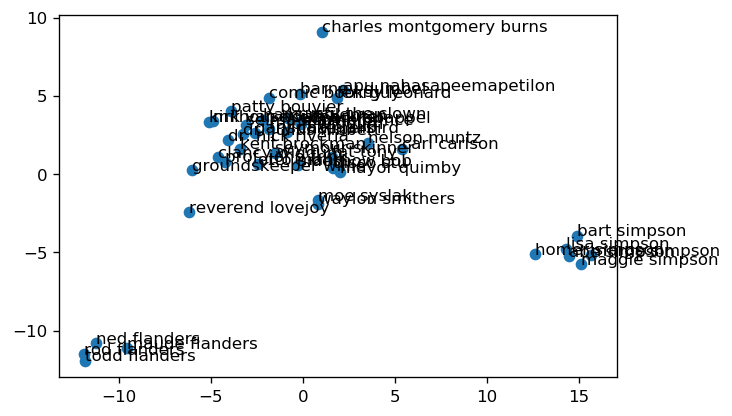

n = 3


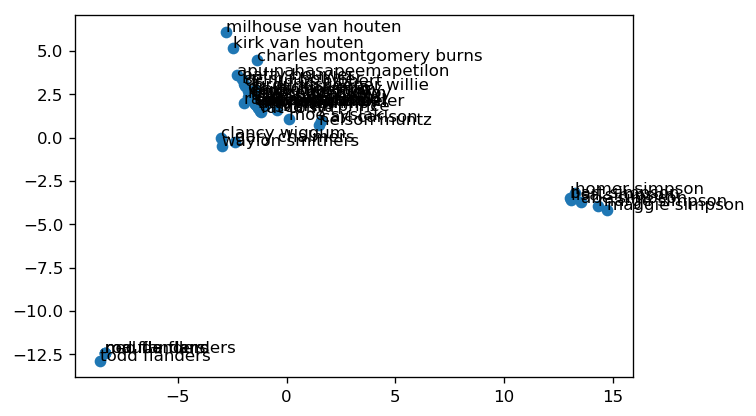

n = 4


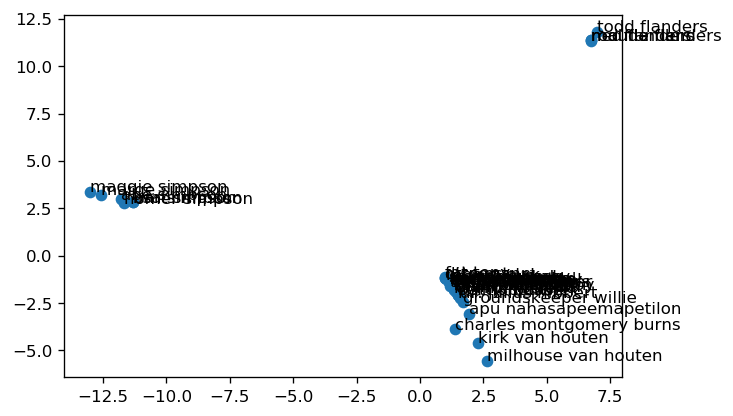

n = 5


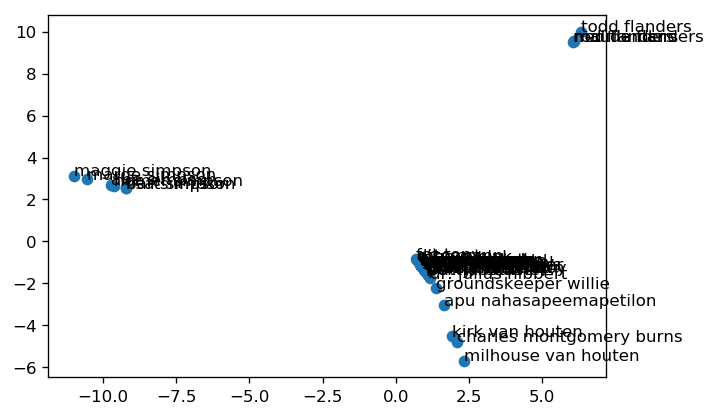

In [8]:
for n in range(2,6):
    matX = nGram_idxs_matX(n)
    xData = matX[0]
    yData = matX[1]
    print("n =", n)
    plotAnnotatedPoints(xData, yData, names)
    plt.show()

n = 3
idxs = (-1, -3)


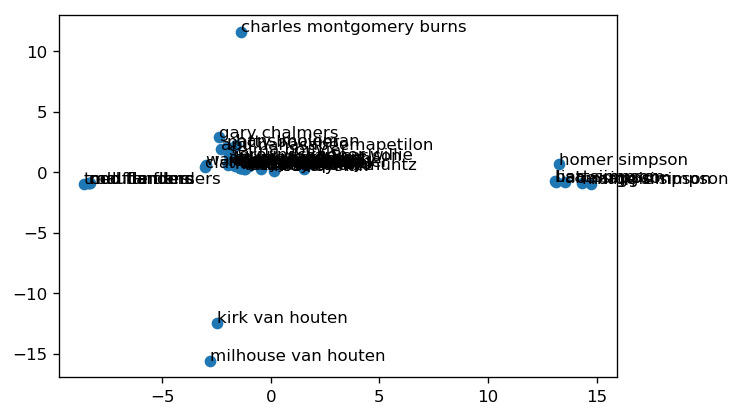

n = 4
idxs = (-1, -3)


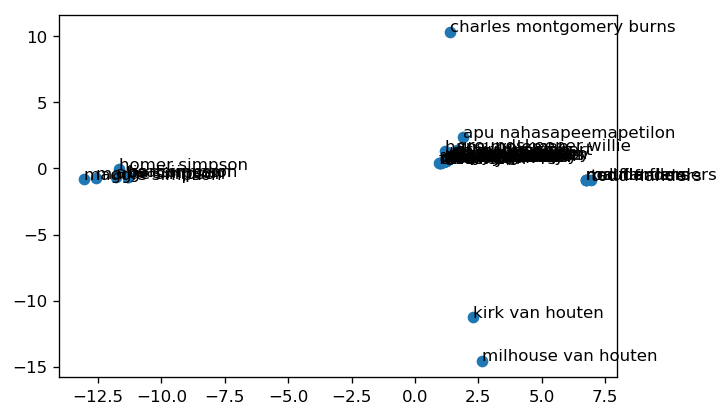

n = 3
idxs = (-2, -3)


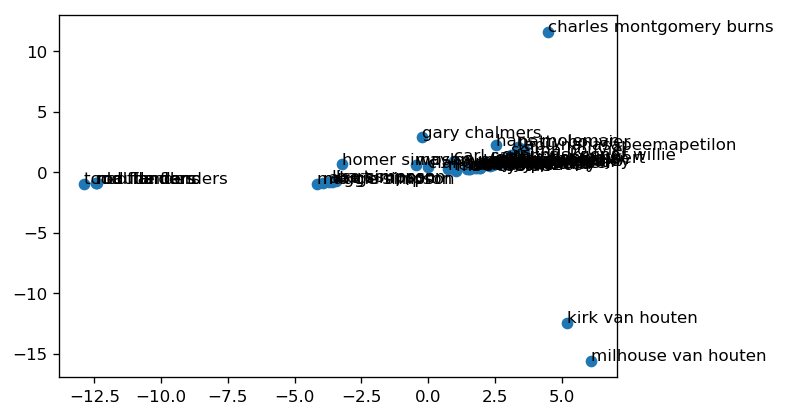

n = 4
idxs = (-2, -3)


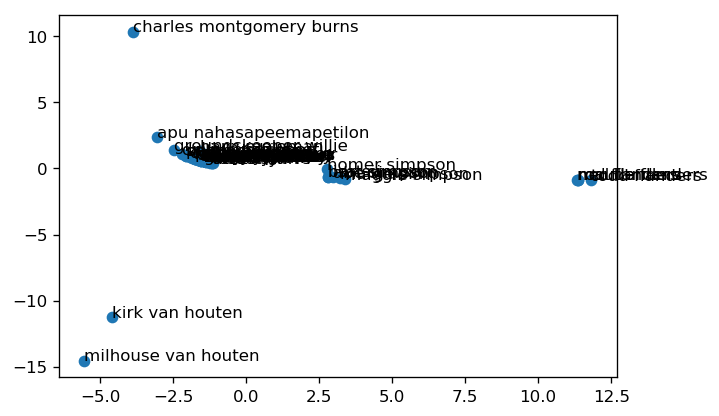

n = 3
idxs = (0, 1)


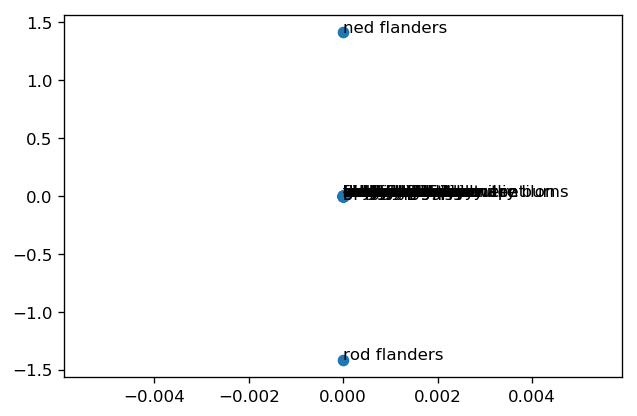

n = 4
idxs = (0, 1)


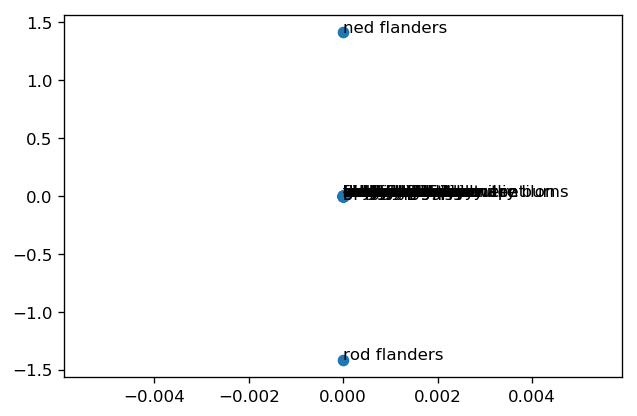

In [9]:
idxsList = [(-1, -3), (-2,-3), (0,1)]
for i in range(len(idxsList)):
    for n in range(3, 5):
        matX = nGram_idxs_matX(n, idxsList[i])
        xData = matX[0]
        yData = matX[1]
        print("n =", n)
        print("idxs =", idxsList[i])
        plotAnnotatedPoints(xData, yData, names)
        plt.show()

In [10]:
import scipy.spatial as spt

In [11]:
matX = nGram_idxs_matX(3, (-1, -2))
T = spt.KDTree(matX.T)

bartMoeKNN5NNRad1 gibt T nicht weiter man rechnet mit vorinitialisiertem T FALSCH

In [12]:
def kNN_FromName(name, k):
    idxName = names.index(name)
    vecName = matX[:,idxName]

    dist, idxs = T.query(vecName, k)
    
    returnList = [names[x] for x in idxs]
        
    return returnList

In [13]:
def neighborsWithinRadiusR(name, r):
    idxName = names.index(name)
    vecName = matX[:,idxName]
    neighborIndices = T.query_ball_point(vecName, r)
    neighbors = list(names[x] for x in neighborIndices)
    return neighbors

In [14]:
def mToTuple(m):
    return tuple([(-1)*(n+1) for n in range(m)])

def bartMoeKNN5NNRad1(m):
    print("m =", m)
    idxs = mToTuple(m)
    matX = nGram_idxs_matX(3, idxs)
    T = spt.KDTree(matX.T)
    
    print("5NN Bart:", kNN_FromName("bart simpson", 5))
    print("5NN Moe:", kNN_FromName("moe syslak", 5))
    
    bartNeighborsDist1 = neighborsWithinRadiusR("bart simpson", 1)
    print("Bart Radius 1:", bartNeighborsDist1)
    
    moeNeighborsDist1 = neighborsWithinRadiusR("moe syslak", 1)
    print("Moe Radius 1:", moeNeighborsDist1)

In [15]:
bartMoeKNN5NNRad1(2)

m = 2
5NN Bart: ['bart simpson', 'lisa simpson', 'homer simpson', 'abe simpson', 'marge simpson']
5NN Moe: ['moe syslak', 'martin prince', 'fat tony', 'seymour skinner', 'disco stu']
Bart Radius 1: ['homer simpson', 'bart simpson', 'lisa simpson', 'abe simpson']
Moe Radius 1: ['moe syslak', 'martin prince']


In [16]:
bartMoeKNN5NNRad1(3)
bartMoeKNN5NNRad1(10)
bartMoeKNN5NNRad1(20)
bartMoeKNN5NNRad1(40)

m = 3
5NN Bart: ['bart simpson', 'lisa simpson', 'homer simpson', 'abe simpson', 'marge simpson']
5NN Moe: ['moe syslak', 'martin prince', 'fat tony', 'seymour skinner', 'disco stu']
Bart Radius 1: ['homer simpson', 'bart simpson', 'lisa simpson', 'abe simpson']
Moe Radius 1: ['moe syslak', 'martin prince']
m = 10
5NN Bart: ['bart simpson', 'lisa simpson', 'homer simpson', 'abe simpson', 'marge simpson']
5NN Moe: ['moe syslak', 'martin prince', 'fat tony', 'seymour skinner', 'disco stu']
Bart Radius 1: ['homer simpson', 'bart simpson', 'lisa simpson', 'abe simpson']
Moe Radius 1: ['moe syslak', 'martin prince']
m = 20
5NN Bart: ['bart simpson', 'lisa simpson', 'homer simpson', 'abe simpson', 'marge simpson']
5NN Moe: ['moe syslak', 'martin prince', 'fat tony', 'seymour skinner', 'disco stu']
Bart Radius 1: ['homer simpson', 'bart simpson', 'lisa simpson', 'abe simpson']
Moe Radius 1: ['moe syslak', 'martin prince']
m = 40
5NN Bart: ['bart simpson', 'lisa simpson', 'homer simpson', 'abe

Die Dimension der Einbettungsräume verändert die Ergebnisse der Berechnungen nicht.

In [17]:
import scipy.cluster.vq as vq

In [18]:
def kMeans(k, m=2, minitParam="random"):
    idxs = mToTuple(m)
    matX = nGram_idxs_matX(3, idxs)
    matM, labels = vq.kmeans2(matX.T, k, minit=minitParam)

    for i in range(k):
        print([name for j, name in enumerate(names) if labels[j] == i])

In [19]:
kMeans(3)

['ned flanders', 'rod flanders', 'todd flanders', 'maude flanders']
['apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'comic book guy', 'prof. john frink', 'barney gumbel', 'dr. julius hibbert', 'edna krabappel', 'krusty the clown', 'reverend lovejoy', 'otto mann', 'martin prince', 'waylon smithers', 'charles montgomery burns', 'moe syslak', 'milhouse van houten', 'clancy wiggum', 'gary chalmers', 'fat tony', 'hans moleman', 'mayor quimby', 'dr. nick riveria', 'sideshow bob', 'snake jailbird', 'groundskeeper willie', 'kirk van houten']
['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'abe simpson']


In [20]:
for k in [3,5,10,20]:
    print("Ab hier k =", k)
    print("")
    for m in [3,10,20,40]:
        print("m =", m)
        print("k =", k)
        kMeans(k, m)
        print("")

Ab hier k = 3

m = 3
k = 3
['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'abe simpson']
['ned flanders', 'rod flanders', 'todd flanders', 'maude flanders']
['apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'comic book guy', 'prof. john frink', 'barney gumbel', 'dr. julius hibbert', 'edna krabappel', 'krusty the clown', 'reverend lovejoy', 'otto mann', 'martin prince', 'waylon smithers', 'charles montgomery burns', 'moe syslak', 'milhouse van houten', 'clancy wiggum', 'gary chalmers', 'fat tony', 'hans moleman', 'mayor quimby', 'dr. nick riveria', 'sideshow bob', 'snake jailbird', 'groundskeeper willie', 'kirk van houten']

m = 10
k = 3
['ned flanders', 'rod flanders', 'todd flanders', 'maude flanders']
['ralph wiggum', 'reverend lovejoy', 'charles montgomery burns', 'milhouse van houten', 'clancy wiggum', 'gary chalmers', 'h

['edna krabappel', 'krusty the clown', 'waylon smithers']
['seymour skinner', 'comic book guy', 'barney gumbel']
['milhouse van houten', 'kirk van houten']
['ned flanders', 'rod flanders', 'todd flanders', 'maude flanders']
['selma bouvier', 'patty bouvier', 'kent brockman', 'carl carlson', 'prof. john frink', 'reverend lovejoy', 'otto mann', 'charles montgomery burns', 'gary chalmers', 'hans moleman']
['nelson muntz', 'dr. julius hibbert', 'groundskeeper willie']
['ralph wiggum', 'clancy wiggum', 'mayor quimby']
['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'abe simpson']
['apu nahasapeemapetilon', 'disco stu', 'lenny leonard', 'martin prince', 'moe syslak', 'fat tony', 'dr. nick riveria', 'sideshow bob', 'snake jailbird']
[]

Ab hier k = 20

m = 3
k = 20
[]
[]
[]
['apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'lenny leonard', 'comic book guy', 'prof. john frink', 'bar

D:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\vq.py:580: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


In [21]:
for _ in range(12):
    kMeans(3, 40)
    print("")

['selma bouvier', 'patty bouvier', 'milhouse van houten', 'kirk van houten']
['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'abe simpson']
['apu nahasapeemapetilon', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'comic book guy', 'ned flanders', 'prof. john frink', 'barney gumbel', 'dr. julius hibbert', 'edna krabappel', 'krusty the clown', 'reverend lovejoy', 'otto mann', 'martin prince', 'waylon smithers', 'charles montgomery burns', 'moe syslak', 'clancy wiggum', 'gary chalmers', 'fat tony', 'rod flanders', 'todd flanders', 'hans moleman', 'mayor quimby', 'dr. nick riveria', 'sideshow bob', 'snake jailbird', 'groundskeeper willie', 'maude flanders']

['dr. julius hibbert', 'milhouse van houten', 'dr. nick riveria', 'kirk van houten']
['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'ned flanders', 'rod flanders', 'todd flanders', 'maude flande

Bei diesen Ergebnissen sieht man schnell, dass sich für unterschiedliche Werte von m und gleich bleibendem
k unterschiedliche Cluster bilden. Ob dies auf die Wahl von m zurückzuführen ist, ist aber fraglich, da
selbst bei gleichem m und gleichem k unterschiedliche Cluster gebildet werden.

In [22]:
for _ in range(12):
    kMeans(3,40,"points")
    print("")

['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'apu nahasapeemapetilon', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'prof. john frink', 'barney gumbel', 'dr. julius hibbert', 'edna krabappel', 'krusty the clown', 'reverend lovejoy', 'otto mann', 'martin prince', 'waylon smithers', 'moe syslak', 'milhouse van houten', 'clancy wiggum', 'gary chalmers', 'fat tony', 'hans moleman', 'mayor quimby', 'dr. nick riveria', 'snake jailbird', 'groundskeeper willie', 'kirk van houten', 'abe simpson']
['ned flanders', 'charles montgomery burns', 'rod flanders', 'todd flanders', 'maude flanders']
['selma bouvier', 'patty bouvier', 'comic book guy', 'sideshow bob']

['apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'comic book guy', 'ned flanders', 'prof. john frink', 'ba

In [23]:
for _ in range(12):
    kMeans(3,40,"++")
    print("")

['ned flanders', 'rod flanders', 'todd flanders', 'maude flanders']
['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'comic book guy', 'prof. john frink', 'barney gumbel', 'dr. julius hibbert', 'edna krabappel', 'krusty the clown', 'otto mann', 'martin prince', 'waylon smithers', 'charles montgomery burns', 'moe syslak', 'milhouse van houten', 'clancy wiggum', 'gary chalmers', 'fat tony', 'hans moleman', 'mayor quimby', 'dr. nick riveria', 'sideshow bob', 'snake jailbird', 'groundskeeper willie', 'kirk van houten', 'abe simpson']
['reverend lovejoy']

['homer simpson', 'marge simpson', 'bart simpson', 'lisa simpson', 'maggie simpson', 'abe simpson']
['ned flanders', 'rod flanders', 'todd flanders', 'maude flanders']
['apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'ne

Unabhängig vom "minit"-Parameter kommen immernoch unterschiedliche Cluster zustande.

In [24]:
def shuffledKMeans(k, m, names, minitParam="random"):
    nameIdxs = np.arange(len(names))
    np.random.shuffle(nameIdxs)
    names = [names[i] for i in nameIdxs]
    
    idxs = mToTuple(m)
    matX = nGram_idxs_matX(3, idxs)
    matX = matX[:,nameIdxs]
    
    matM, labels = vq.kmeans2(matX.T, k, minit=minitParam)

    for i in range(k):
        print([name for j, name in enumerate(names) if labels[j] == i])

In [25]:
for _ in range(12):
    shuffledKMeans(3,40,names,"random")
    print("")

['rod flanders', 'maude flanders', 'ned flanders', 'todd flanders']
['clancy wiggum', 'charles montgomery burns', 'ralph wiggum', 'dr. nick riveria', 'carl carlson', 'krusty the clown', 'patty bouvier', 'moe syslak', 'disco stu', 'prof. john frink', 'edna krabappel', 'kirk van houten', 'reverend lovejoy', 'dr. julius hibbert', 'milhouse van houten', 'martin prince', 'mayor quimby', 'selma bouvier', 'snake jailbird', 'comic book guy', 'sideshow bob', 'seymour skinner', 'lenny leonard', 'apu nahasapeemapetilon', 'otto mann', 'gary chalmers', 'groundskeeper willie', 'waylon smithers', 'nelson muntz', 'fat tony', 'kent brockman', 'barney gumbel', 'hans moleman']
['bart simpson', 'maggie simpson', 'abe simpson', 'marge simpson', 'lisa simpson', 'homer simpson']

['maude flanders', 'todd flanders', 'kent brockman', 'fat tony', 'edna krabappel', 'dr. julius hibbert', 'ned flanders', 'prof. john frink', 'hans moleman', 'charles montgomery burns', 'otto mann', 'mayor quimby', 'moe syslak', 'dr.

['charles montgomery burns', 'snake jailbird', 'groundskeeper willie', 'krusty the clown']
['prof. john frink', 'martin prince', 'kent brockman']
['maggie simpson', 'nelson muntz', 'waylon smithers', 'dr. julius hibbert', 'kirk van houten', 'moe syslak', 'todd flanders', 'dr. nick riveria', 'seymour skinner', 'carl carlson', 'hans moleman', 'gary chalmers', 'ralph wiggum', 'bart simpson', 'homer simpson', 'apu nahasapeemapetilon', 'otto mann', 'disco stu', 'clancy wiggum', 'sideshow bob', 'patty bouvier', 'maude flanders', 'lisa simpson', 'comic book guy', 'barney gumbel', 'edna krabappel', 'mayor quimby', 'rod flanders', 'selma bouvier', 'lenny leonard', 'abe simpson', 'fat tony', 'reverend lovejoy', 'ned flanders', 'marge simpson', 'milhouse van houten']



In [26]:
for _ in range(12):
    shuffledKMeans(3,40,names,"++")
    print("")

['waylon smithers', 'reverend lovejoy', 'gary chalmers', 'comic book guy', 'hans moleman', 'otto mann', 'groundskeeper willie', 'charles montgomery burns', 'sideshow bob', 'patty bouvier', 'maude flanders', 'kirk van houten', 'ned flanders', 'apu nahasapeemapetilon', 'mayor quimby', 'todd flanders', 'disco stu', 'dr. julius hibbert', 'martin prince', 'milhouse van houten', 'carl carlson', 'edna krabappel', 'clancy wiggum', 'selma bouvier', 'ralph wiggum', 'lenny leonard', 'seymour skinner', 'barney gumbel', 'kent brockman', 'fat tony', 'snake jailbird', 'dr. nick riveria', 'prof. john frink', 'moe syslak', 'rod flanders', 'nelson muntz']
['homer simpson', 'maggie simpson', 'abe simpson', 'lisa simpson', 'bart simpson', 'marge simpson']
['krusty the clown']

['lenny leonard', 'selma bouvier', 'patty bouvier', 'comic book guy', 'ralph wiggum', 'mayor quimby', 'nelson muntz', 'rod flanders', 'sideshow bob', 'fat tony', 'carl carlson', 'dr. nick riveria', 'edna krabappel', 'waylon smithers

['edna krabappel']
['maude flanders', 'ned flanders', 'kent brockman', 'hans moleman', 'selma bouvier', 'clancy wiggum', 'martin prince', 'krusty the clown', 'prof. john frink', 'dr. julius hibbert', 'kirk van houten', 'seymour skinner', 'reverend lovejoy', 'todd flanders', 'otto mann', 'rod flanders', 'sideshow bob', 'fat tony', 'mayor quimby', 'carl carlson', 'milhouse van houten', 'groundskeeper willie', 'dr. nick riveria', 'nelson muntz', 'comic book guy', 'barney gumbel', 'charles montgomery burns', 'disco stu', 'snake jailbird', 'lenny leonard', 'apu nahasapeemapetilon', 'ralph wiggum', 'moe syslak', 'waylon smithers', 'patty bouvier', 'gary chalmers']
['maggie simpson', 'lisa simpson', 'homer simpson', 'abe simpson', 'marge simpson', 'bart simpson']



In [27]:
for _ in range(12):
    shuffledKMeans(3,40,names,"points")
    print("")

['comic book guy', 'patty bouvier', 'sideshow bob', 'krusty the clown', 'selma bouvier', 'charles montgomery burns']
['reverend lovejoy']
['carl carlson', 'dr. julius hibbert', 'milhouse van houten', 'hans moleman', 'clancy wiggum', 'barney gumbel', 'ned flanders', 'seymour skinner', 'otto mann', 'maggie simpson', 'maude flanders', 'lenny leonard', 'rod flanders', 'edna krabappel', 'homer simpson', 'snake jailbird', 'ralph wiggum', 'dr. nick riveria', 'abe simpson', 'mayor quimby', 'lisa simpson', 'apu nahasapeemapetilon', 'nelson muntz', 'martin prince', 'marge simpson', 'kent brockman', 'bart simpson', 'gary chalmers', 'waylon smithers', 'kirk van houten', 'prof. john frink', 'groundskeeper willie', 'todd flanders', 'disco stu', 'fat tony', 'moe syslak']

['homer simpson', 'bart simpson', 'abe simpson', 'lisa simpson', 'marge simpson', 'maggie simpson']
['lenny leonard']
['selma bouvier', 'ned flanders', 'mayor quimby', 'sideshow bob', 'fat tony', 'snake jailbird', 'otto mann', 'clan

['sideshow bob', 'waylon smithers', 'lenny leonard', 'clancy wiggum', 'krusty the clown', 'patty bouvier', 'ned flanders', 'dr. nick riveria', 'milhouse van houten', 'bart simpson', 'abe simpson', 'carl carlson', 'ralph wiggum', 'fat tony', 'otto mann', 'dr. julius hibbert', 'prof. john frink', 'edna krabappel', 'kirk van houten', 'nelson muntz', 'selma bouvier', 'groundskeeper willie', 'hans moleman', 'reverend lovejoy', 'rod flanders', 'todd flanders', 'maggie simpson', 'homer simpson', 'marge simpson', 'lisa simpson', 'moe syslak', 'comic book guy', 'apu nahasapeemapetilon', 'seymour skinner', 'martin prince', 'snake jailbird', 'barney gumbel', 'maude flanders', 'disco stu', 'mayor quimby']
['gary chalmers', 'charles montgomery burns']
['kent brockman']



Auch mit zufälliger Spaltenwahl ergeben sich sehr unterschiedliche Ergebnisse bei gleicher Parameterwahl.

In [28]:
def macQueen(matX, k):
    rows = len(matX)
    
    n = np.ones(k)
    means = matX[:k]
    
    for j in range(k + 1, rows):
        minWValue = np.linalg.norm(matX[j] - means[0])
        minIndex = 0
        for i in range(1, k):
            currentW = np.linalg.norm(matX[j] - means[i])
            if minWValue > currentW:
                minIndex = i
                minWValue = currentW
        n[minIndex] += 1
        means[minIndex] = means[minIndex] + (1./n[minIndex]) * (matX[j] - means[minIndex])
    
    labels = np.zeros(rows)
    
    meanDistances = np.zeros((rows, k))
    for index, mean in enumerate(means):
        meanDistances[:, index] = np.linalg.norm(matX - mean, axis = 1)
    labels = meanDistances.argmin(axis = 1)
    
    return labels

In [29]:
def shuffledMacQueen(k, m, names):  
    nameIdxs = np.arange(len(names))
    np.random.shuffle(nameIdxs)
    names = [names[i] for i in nameIdxs]

    idxs = mToTuple(m)
    matX = nGram_idxs_matX(3, idxs)
    matX = matX[:,nameIdxs]
    
    labels = macQueen(matX.T, k)
        
    return labels

In [30]:
def printMacQueenCluster(labels, k):
    for i in range(k):
        print([name for j, name in enumerate(names) if labels[j] == i])

In [31]:
for _ in range(5):
    printMacQueenCluster(macQueen(matX.T, 3), 3)
    print("")

['homer simpson', 'lisa simpson', 'abe simpson']
['marge simpson', 'maggie simpson']
['bart simpson', 'apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'comic book guy', 'ned flanders', 'prof. john frink', 'barney gumbel', 'dr. julius hibbert', 'edna krabappel', 'krusty the clown', 'reverend lovejoy', 'otto mann', 'martin prince', 'waylon smithers', 'charles montgomery burns', 'moe syslak', 'milhouse van houten', 'clancy wiggum', 'gary chalmers', 'fat tony', 'rod flanders', 'todd flanders', 'hans moleman', 'mayor quimby', 'dr. nick riveria', 'sideshow bob', 'snake jailbird', 'groundskeeper willie', 'kirk van houten', 'maude flanders']

['homer simpson', 'lisa simpson', 'abe simpson']
['marge simpson', 'maggie simpson']
['bart simpson', 'apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent 

In [32]:
for _ in range(5):
    printMacQueenCluster(shuffledMacQueen(3, 20, names), 3)
    print("")

['homer simpson', 'snake jailbird']
['marge simpson', 'lisa simpson', 'maggie simpson', 'apu nahasapeemapetilon', 'selma bouvier', 'patty bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'ned flanders', 'prof. john frink', 'barney gumbel', 'dr. julius hibbert', 'edna krabappel', 'krusty the clown', 'reverend lovejoy', 'otto mann', 'martin prince', 'waylon smithers', 'charles montgomery burns', 'moe syslak', 'milhouse van houten', 'clancy wiggum', 'gary chalmers', 'fat tony', 'rod flanders', 'todd flanders', 'hans moleman', 'mayor quimby', 'dr. nick riveria', 'sideshow bob', 'groundskeeper willie', 'kirk van houten', 'maude flanders', 'abe simpson']
['bart simpson', 'comic book guy']

['homer simpson']
['marge simpson', 'lisa simpson', 'maggie simpson', 'selma bouvier', 'nelson muntz', 'ralph wiggum', 'seymour skinner', 'disco stu', 'kent brockman', 'carl carlson', 'lenny leonard', 'comic book guy', 'ned flanders

Aus den Ergebnissen wird ersichtlich, dass der Algorithmus von MacQueen stets die gleichen Cluster bei gegebenem Input liefert. Lediglich, wenn man mit den geshuffelten Versionen arbeitet erhält man andere Ergebnisse.
Das lässt sich darauf zurückführen, dass bei MacQueen die ersten k Datenpunkte die ersten k Cluster bilden und 
das Updaten der Cluster deterministisch auf einem Distanzmaß basiert, welches bei jedem Aufruf der gleichen
Daten gleich ist.